In [207]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [208]:
df_can = pd.read_excel("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx",
                      sheet_name = "Canada by Citizenship",
                      skiprows = range(20),
                      skipfooter = 2
                      )

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [209]:
print(df_can.shape)

(195, 43)


#### Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).

In [210]:
df_can.drop(['Type', 'AREA', 'REG', 'Coverage', 'DEV'], axis=1, inplace=True)

df_can.head()
df_can.shape

(195, 38)

#### Rename some of the columns so that they make sense

In [211]:
df_can.rename(columns={"OdName":"Country", "AreaName":"Continent", "RegName":"Region"}, inplace=True)

df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


#### For consistency, ensure that all column labels of type string.

In [212]:
for column in df_can.columns:
    print(isinstance(column, str))

df_can.columns

True
True
True
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [213]:
df_can.columns = list(map(str, df_can.columns))
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

#### Set the country name as index - useful for quickly looking up countries using .loc method.

In [214]:
df_can.set_index("Country", inplace=True)

df_can.index

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)

In [215]:
df_can['Total'] = df_can.sum(axis=1)

In [216]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [217]:
print(df_can.shape)

(195, 38)


In [218]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Visualizing Data using Matplotlib

In [219]:
%matplotlib inline

mpl.style.use('ggplot')

### Area Plots

#### In the last module, we created a line plot that visualized the top 5 countries that contribued the most immigrants to Canada from 1980 to 2013. With a little modification to the code, we can visualize this plot as a cumulative plot, also knows as a Stacked Line Plot or Area plot.

In [220]:
df_can.sort_values(["Total"], ascending=False, inplace=True, axis=0)

df_top5 = df_can.head(5)

df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass stacked=False.

In [221]:
df_top5.index = df_top5.index.map(int)

In [222]:
type(df_top5.index)

pandas.core.indexes.numeric.Int64Index

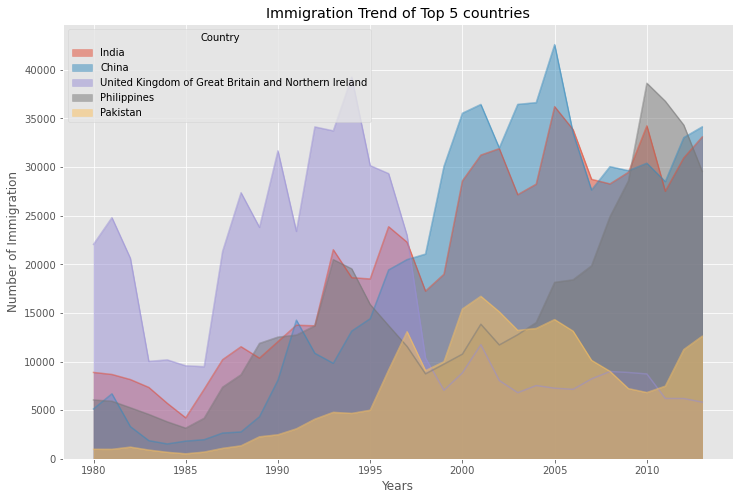

In [223]:
df_top5.plot(kind="area", 
             stacked=False,
             figsize=(12,8))

plt.title("Immigration Trend of Top 5 countries")
plt.xlabel("Years")
plt.ylabel("Number of Immigration")
plt.show()

The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter.

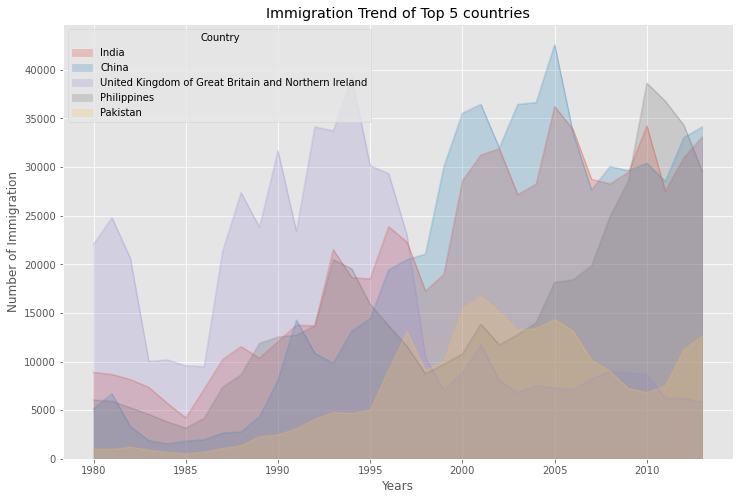

In [224]:
df_top5.plot(kind="area", 
             alpha=0.25,
             stacked=False,
             figsize=(12,8))

plt.title("Immigration Trend of Top 5 countries")
plt.xlabel("Years")
plt.ylabel("Number of Immigration")
plt.show()

#### Two types of plotting

As we discussed in the video lectures, there are two styles/options of ploting with matplotlib. Plotting using the Artist layer and plotting using the scripting layer.

**Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt' **

**Option 2: Artist layer (Object oriented method) - using an Axes instance from Matplotlib (preferred) **

In this course, we will stick to the scripting layer, except for some advanced visualizations where we will need to use the artist layer to manipulate advanced aspects of the plots.

Text(0.5, 0, 'Years')

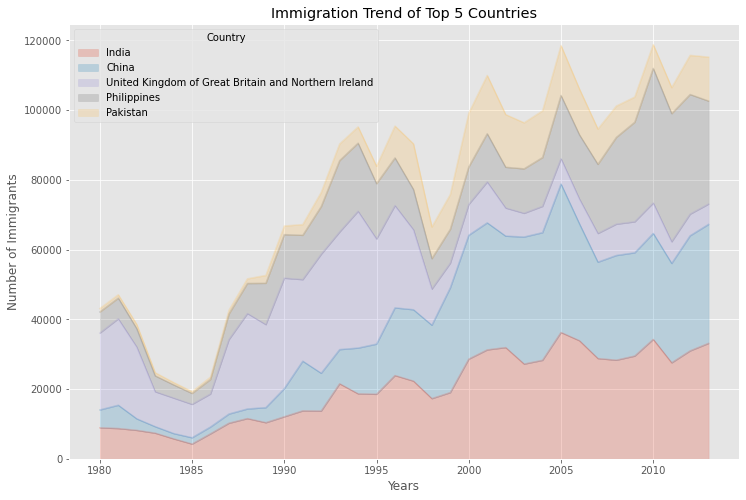

In [225]:
ax = df_top5.plot(kind="area", figsize=(12,8), alpha=0.25)

ax.set_title("Immigration Trend of Top 5 Countries")
ax.set_ylabel("Number of Immigrants")
ax.set_xlabel("Years")

Question: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

In [226]:
df_least5 = df_can.tail(5)
df_least5 = df_least5[years].transpose()
df_least5.head()

Country,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,1,0,0,0,0
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


In [227]:
#### Alternate method

df_can.sort_values(["Total"], ascending=True, axis=0, inplace=True)
df_least5 = df_can.head()
df_least5 = df_least5[years].transpose()

In [228]:
df_least5.head()

Country,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino
1980,0,0,0,0,1
1981,0,0,0,0,0
1982,0,0,0,0,0
1983,0,0,0,0,0
1984,0,0,0,0,0


In [229]:
df_least5.index = df_least5.index.map(int)

In [231]:
df_least5.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

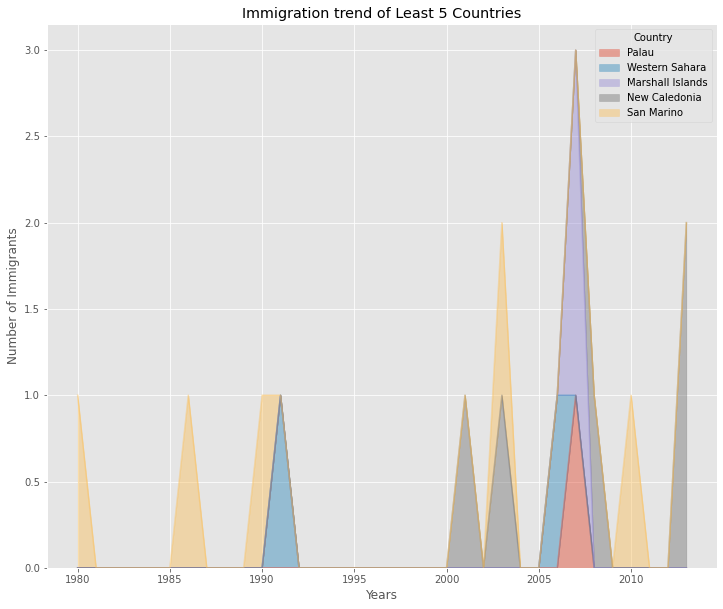

In [233]:
df_least5.plot(kind="area",
              stacked=True,
              alpha=0.45,
              figsize=(12,10))

plt.title("Immigration trend of Least 5 Countries")
plt.xlabel("Years")
plt.ylabel("Number of Immigrants")

plt.show()

Question: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

Text(0, 0.5, 'Number of Immigrants')

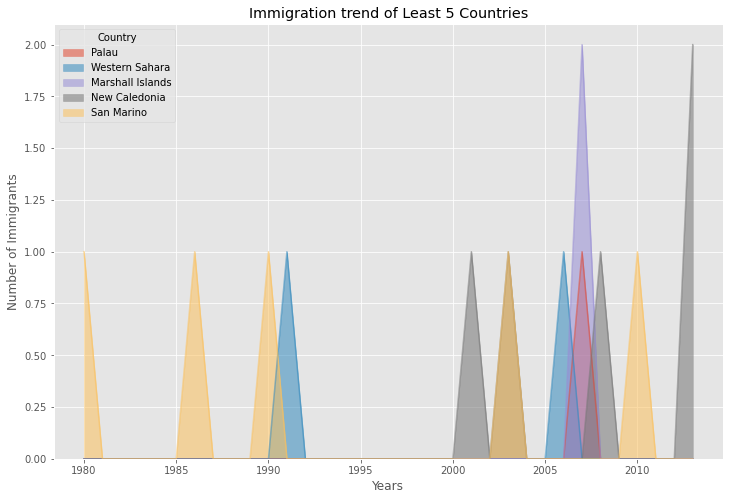

In [234]:
ax = df_least5.plot(kind="area", figsize=(12,8), stacked=False, alpha=0.55)

ax.set_title("Immigration trend of Least 5 Countries")
ax.set_xlabel("Years")
ax.set_ylabel("Number of Immigrants")

### Histograms

Question: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [235]:
df_can['2013'].head()

Country
Palau               0
Western Sahara      0
Marshall Islands    0
New Caledonia       2
San Marino          0
Name: 2013, dtype: int64

In [240]:
count, bin_edges = np.histogram(df_can['2013'])

print("Count:", count, '\n', "Bin ranges: ", bin_edges)


Count: [178  11   1   2   0   0   0   0   1   2] 
 Bin ranges:  [    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


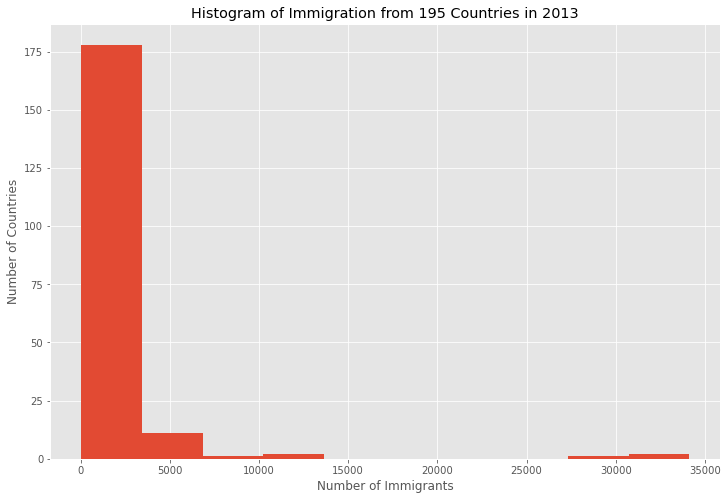

In [242]:
df_can['2013'].plot(kind="hist", figsize=(12,8))

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin sizes, as follows:

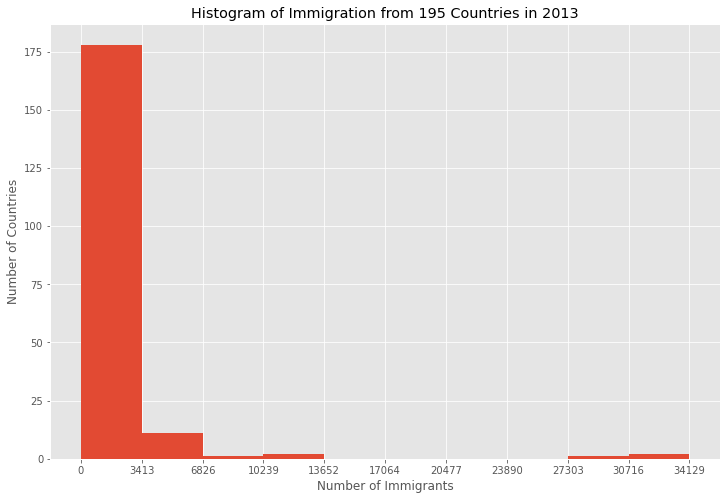

In [243]:
df_can['2013'].plot(kind="hist", figsize=(12,8), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

#### Question: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [247]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<AxesSubplot:ylabel='Frequency'>

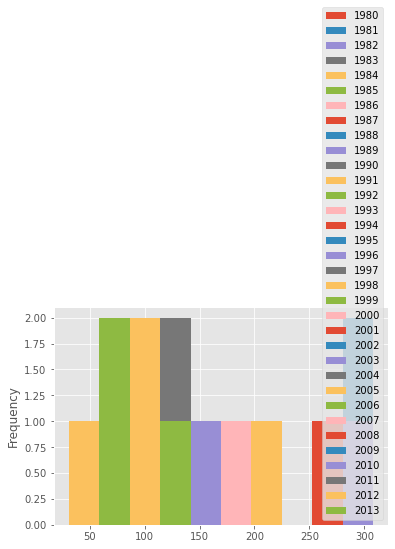

In [248]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

That does not look right!

Don't worry, you'll often come across situations like this when creating plots. The solution often lies in how the underlying dataset is structured.

Instead of plotting the population frequency distribution of the population for the 3 countries, pandas instead plotted the population frequency distribution for the years.

In [251]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

In [252]:
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


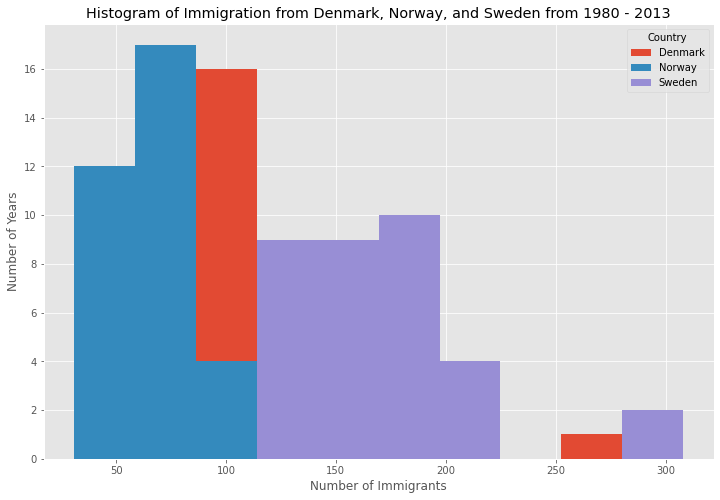

In [253]:
df_t.plot(kind="hist", figsize=(12,8))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Let's make a few modifications to improve the impact and aesthetics of the previous plot:

- increase the bin size to 15 by passing in bins parameter
- set transparency to 60% by passing in alpha paramemter
- label the x-axis by passing in x-label paramater
- change the colors of the plots by passing in color parameter

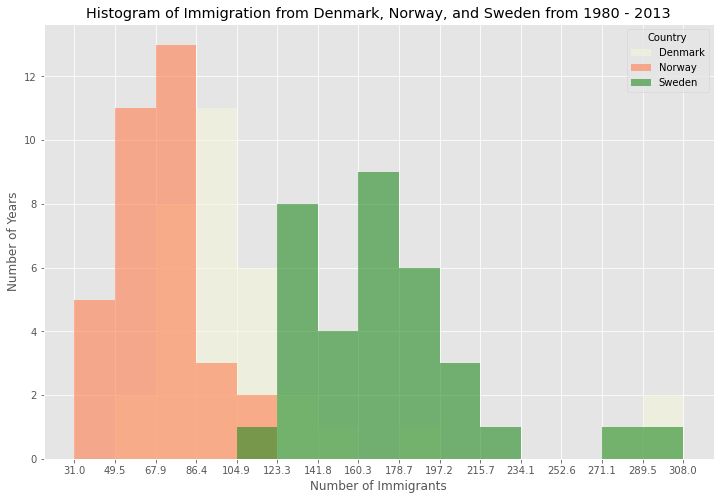

In [262]:
count, bin_edges = np.histogram(df_t, 15)

df_t.plot(kind="hist", 
         figsize=(12,8), 
         bins=15,
         alpha=0.6,
         xticks=bin_edges,
         color=['beige', 'coral', 'forestgreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [258]:
# Tip: For a full listing of colors available in Matplotlib, run the following code in your python shell:

import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


If we do no want the plots to overlap each other, we can stack them using the stacked paramemter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the xlim paramater, as show below.

In [267]:
count, bin_edges = np.histogram(df_t, 15)

#print(bin_edges[0])
#print(bin_edges[-1])

xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10

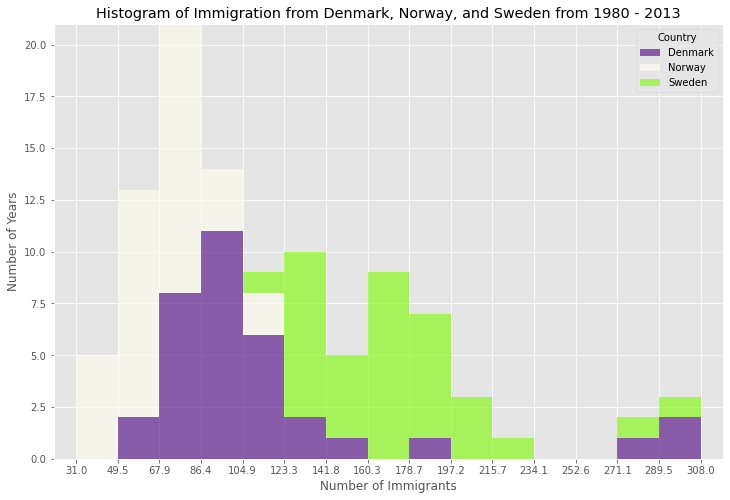

In [269]:
df_t.plot(kind="hist", 
         figsize=(12,8),
         alpha=0.6,
         stacked=True,
         xlim=(xmin, xmax),
         bins=15,
         xticks=bin_edges,
         color =['indigo', 'ivory', 'lawngreen'])

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Question: Use the artist layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

In [277]:
df1 = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]
df1 = df1[years].transpose()

df1.head()

Country,Greece,Albania,Bulgaria
1980,1065,1,24
1981,953,0,20
1982,897,0,12
1983,633,0,33
1984,580,0,11


Text(0.5, 0, 'Number of Immigrants')

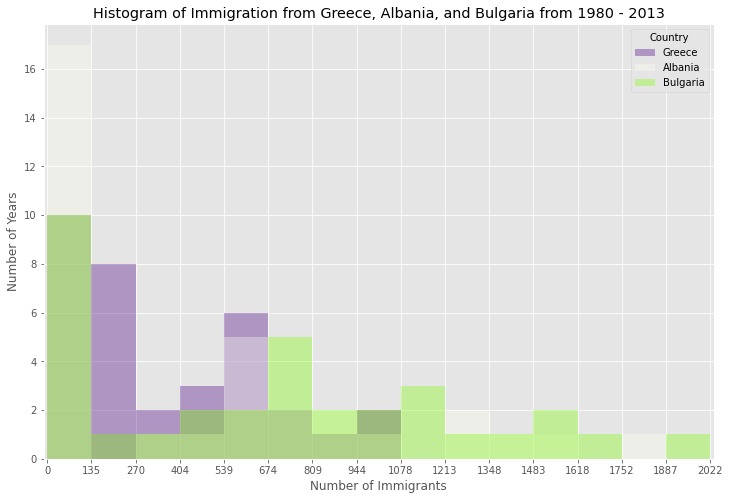

In [280]:
count, bin_edges = np.histogram(df1, 15)
xmin = bin_edges[0]-10
xmax = bin_edges[-1]+10

ax = df1.plot(kind="hist", figsize=(12,8), alpha=0.35, bins=15, xticks=bin_edges,
              xlim = (xmin, xmax), color=['indigo', 'ivory', 'lawngreen'])

ax.set_title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
ax.set_ylabel('Number of Years')
ax.set_xlabel('Number of Immigrants')


Question: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

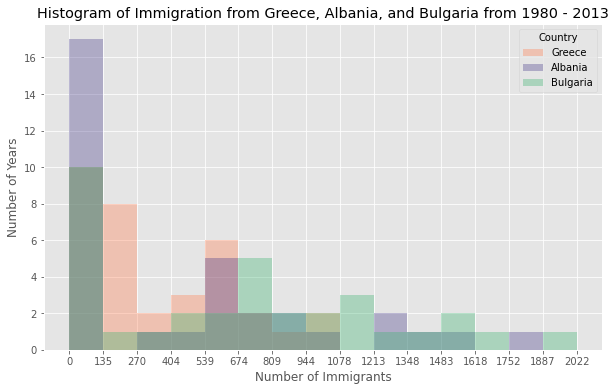

In [281]:
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

    # transpose the dataframe
df_cof = df_cof.transpose() 

    # let's get the x-tick values
count, bin_edges = np.histogram(df_cof, 15)

    # Un-stacked Histogram
df_cof.plot(kind ='hist',
            figsize=(10, 6),
            bins=15,
            alpha=0.35,
            xticks=bin_edges,
            color=['coral', 'darkslateblue', 'mediumseagreen']
            )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

### Bar Charts (Dataframe)

Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [283]:
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

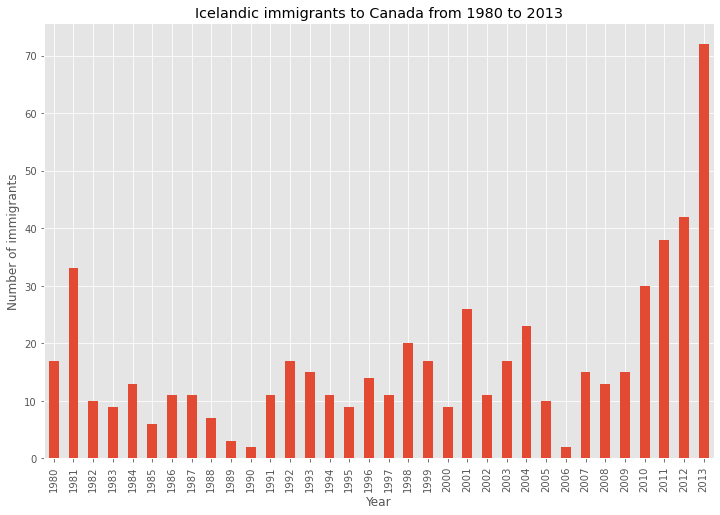

In [285]:
df_iceland.plot(kind="bar", figsize=(12,8))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008.

Let's annotate this on the plot using the annotate method of the scripting layer or the pyplot interface. We will pass in the following parameters:

- s: str, the text of annotation.
- xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- arrowprops: Takes a dictionary of properties to draw the arrow:
    - arrowstyle: Specifies the arrow style, '->' is standard arrow.
    - connectionstyle: Specifies the connection type. arc3 is a straight line.
    - color: Specifes color of arror.
    - lw: Specifies the line width.
    
I encourage you to read the Matplotlib documentation for more details on annotations: 
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

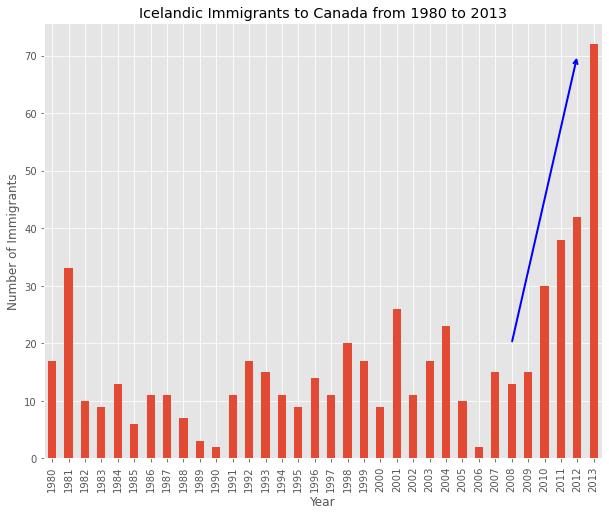

In [294]:
df_iceland.plot(kind="bar", figsize=(10, 8), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

plt.annotate('', 
            xy=(32,70),
            xytext=(28,20),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Let's also annotate a text to go over the arrow. We will pass in the following additional parameters:

- rotation: rotation angle of text in degrees (counter clockwise)
- va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

Text(28, 30, '2008 - 2011 Financial Crisis')

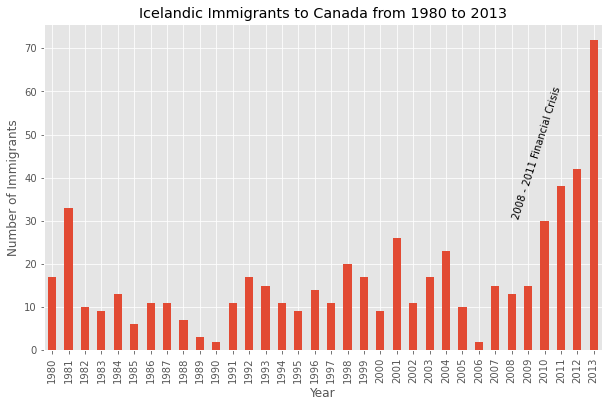

In [296]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

### Annotate text

plt.annotate('2008 - 2011 Financial Crisis',
            xy = (28,30),
            rotation = 72.5,
            va='bottom',
            ha='left')

### Horizontal Bar Plot

Question: Using the scripting layter and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

In [305]:
df_can.sort_values('Total', ascending=False, axis=0, inplace=True)

df_top15 = df_can.head(15)

df_top15 = df_top15['Total'].transpose()

df_top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

691,904
659,962
551,500
511,391
241,600
241,122
175,923
148,358
142,581
139,241
115,359
109,091
106,431
97,146
93,585


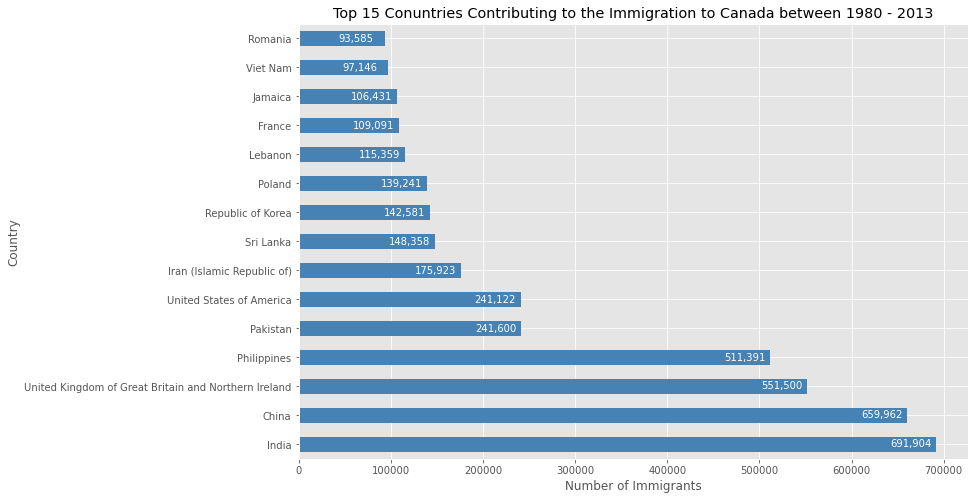

In [312]:
df_top15.plot(kind="barh", figsize=(12,8), color = 'steelblue')

plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(df_top15):
    label = format(int(value), ',')
    print(label)

    plt.annotate(label, xy=(value - 50000, index - 0.1 ), color = 'white')
plt.show()